In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

IPython Notebook 내 그래프를 직접 출력하는 설정

% 기호로 시작하면 IPython "매직" 명령 (교재 p.86 "매직" 명령 참조)

In [2]:
%matplotlib inline

usa.gov 데이터

In [2]:
path = 'pydata/ch02/usagov_bitly_data2012-03-16-1331923249.txt'

경로 구분자는 어떤 운영체제에서든 / 로 하는 것을 권장

In [1]:
print('some_dir\new_item')

some_dir
ew_item


In [3]:
open(path)

<open file 'pydata/ch02/usagov_bitly_data2012-03-16-1331923249.txt', mode 'r' at 0x0000000003E0D030>

In [4]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

JSON 문자열을 파이썬 객체로 변환하기

In [ ]:
import json
records = [json.loads(line) for line in open(path)]

In [10]:
records[0]['tz']

u'America/New_York'

In [8]:
%pwd

u'C:\\Users\\student\\Documents\\Python Scripts'

In [9]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: C486-D054

 C:\Users\student\Documents\Python Scripts 디렉터리

2015-09-14  오후 03:10    <DIR>          .
2015-09-14  오후 03:10    <DIR>          ..
2015-09-14  오후 03:02    <DIR>          .ipynb_checkpoints
2015-09-14  오전 11:32                22 hello_encoding.txt
2015-09-14  오후 02:49                46 my_module.py
2015-09-14  오후 02:50               219 my_module.pyc
2015-09-14  오후 03:00    <DIR>          pydata
2015-09-14  오후 02:59        42,044,366 pydata-book-master.zip
2015-09-14  오후 03:10             4,237 사례소개.ipynb
2015-09-14  오후 02:41             8,139 파이썬 제어.ipynb
2015-09-14  오후 01:57            42,754 파이썬 프로그래밍 기초.ipynb
2015-09-14  오후 02:52             3,675 파이썬 함수.ipynb
               8개 파일          42,103,458 바이트
               4개 디렉터리  456,834,596,864 바이트 남음


순수 파이썬으로 시간대 통계 정보 집계

In [12]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [13]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [14]:
def get_counts(sequence):
    """sequence의 값의 빈도 집계
    예: {u'NY': 3, u'Seoul': 2}"""
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [15]:
data = ['NY', 'NY', 'SEOUL', 'SEOUL', 'SEOUL']
get_counts(data)

{'NY': 2, 'SEOUL': 3}

In [16]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [17]:
counts

{u'': 521,
 u'Africa/Cairo': 3,
 u'Africa/Casablanca': 1,
 u'Africa/Ceuta': 2,
 u'Africa/Johannesburg': 1,
 u'Africa/Lusaka': 1,
 u'America/Anchorage': 5,
 u'America/Argentina/Buenos_Aires': 1,
 u'America/Argentina/Cordoba': 1,
 u'America/Argentina/Mendoza': 1,
 u'America/Bogota': 3,
 u'America/Caracas': 1,
 u'America/Chicago': 400,
 u'America/Chihuahua': 2,
 u'America/Costa_Rica': 1,
 u'America/Denver': 191,
 u'America/Edmonton': 6,
 u'America/Guayaquil': 2,
 u'America/Halifax': 4,
 u'America/Indianapolis': 20,
 u'America/La_Paz': 1,
 u'America/Lima': 1,
 u'America/Los_Angeles': 382,
 u'America/Managua': 3,
 u'America/Mazatlan': 1,
 u'America/Mexico_City': 15,
 u'America/Monterrey': 1,
 u'America/Montevideo': 1,
 u'America/Montreal': 9,
 u'America/New_York': 1251,
 u'America/Phoenix': 20,
 u'America/Puerto_Rico': 10,
 u'America/Rainy_River': 25,
 u'America/Recife': 2,
 u'America/Santo_Domingo': 1,
 u'America/Sao_Paulo': 33,
 u'America/St_Kitts': 1,
 u'America/Tegucigalpa': 1,
 u'Ameri

In [18]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    # count 값을 기준으로 정렬
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [20]:
top_counts(counts)[::-1]

[(1251, u'America/New_York'),
 (521, u''),
 (400, u'America/Chicago'),
 (382, u'America/Los_Angeles'),
 (191, u'America/Denver'),
 (74, u'Europe/London'),
 (37, u'Asia/Tokyo'),
 (36, u'Pacific/Honolulu'),
 (35, u'Europe/Madrid'),
 (33, u'America/Sao_Paulo')]

함수 작성대신 파이썬의 표준 라이브러리를 활용하는 경우

In [26]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10) # 빈도 상위 10개 집계

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

## pandas로 수행하기

In [27]:
from pandas import DataFrame, Series
import pandas as pd

In [28]:
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [29]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 528.4+ KB


시간대 (다시) 집계해 보기

In [30]:
frame['tz'].value_counts()

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Prague                       10
Europe/Helsinki                     10
Asia/Hong_Kong                      10
America/Puerto_Rico      

없는 필드와 비어있는 값 처리

In [32]:
clean_tz = frame['tz'].fillna('Missing')

불리언 필터로 비어있는 값을 처리

In [41]:
type(selection)

pandas.core.series.Series

In [42]:
del selection
selection

NameError: name 'selection' is not defined

In [38]:
clean_tz[selection]= 'Unknown'
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                   Unknown
8                   Unknown
9                   Unknown
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                  Missing
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                  Unknown
29                  Unknown
               ...         
3530    America/Los_Angeles
3531                Unknown
3532       America/New_York
3533       America/New_York
3534        America/

In [39]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
dtype: int64

IPython Notebook 내에서 그래프 출력 설정

In [43]:
%matplotlib inline

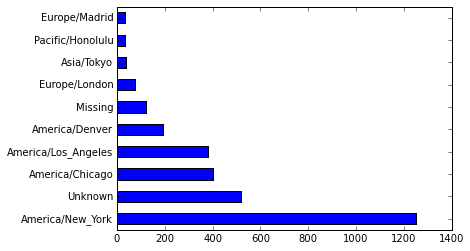

In [47]:
tz_counts[:10].plot(kind='barh', rot=0)

어떤 브라우저인가?

In [49]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

없는 값은 떨구기

In [56]:
agents = [a.split()[0] for a in frame['a'].dropna()]
results = Series(agents)
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [58]:
results.value_counts()[:5]

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

윈도우 Vs. 비-윈도우

In [59]:
frame['a'][:10]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [60]:
cframe = frame[frame.a.notnull()]

In [61]:
frame["a"] == frame.a

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13      False
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
3530     True
3531     True
3532     True
3533     True
3534     True
3535     True
3536     True
3537     True
3538     True
3539     True
3540     True
3541     True
3542     True
3543    False
3544     True
3545     True
3546     True
3547     True
3548     True
3549     True
3550     True
3551     True
3552     True
3553     True
3554     True
3555     True
3556     True
3557     True
3558     True
3559     True
Name: a, dtype: bool

In [62]:
cframe['a'][0]

u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [68]:
import numpy as np

operating_system = np.where(cframe['a'].str.contains('Windows'),
         'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

시간대별 운영체제 분류

In [69]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [70]:
by_tz_os

In [74]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [79]:
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [82]:
count_subset = agg_counts.take(indexer)[-10:]

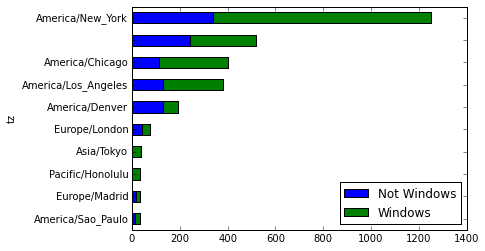

In [85]:
count_subset.plot(kind='barh', stacked=True)

비율을 비교해서 살펴보기 쉽도록 정규화

In [89]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,0.393939,0.606061
Europe/Madrid,0.457143,0.542857
Pacific/Honolulu,0.000000,1.000000
Asia/Tokyo,0.054054,0.945946
Europe/London,0.581081,0.418919
America/Denver,0.691099,0.308901
America/Los_Angeles,0.340314,0.659686
America/Chicago,0.287500,0.712500
,0.470250,0.529750


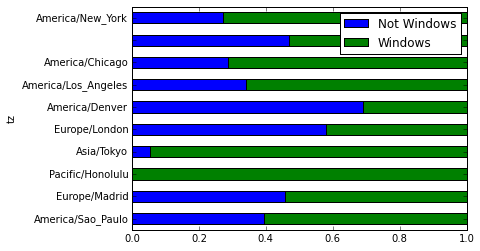

In [90]:
normed_subset.plot(kind='barh', stacked=True)

## 영화 평점 분석

In [9]:
path = 'pydata/ch02/movielens'

'pydata/ch02/movielens\\users.dat'

In [11]:
users=pd.read_csv(path+'/users.dat',
           sep='::',
           header=None,
           names=['user_id', 'gender', 'age', 'occupation', 'zip'])
users[:3]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [14]:
ratings = pd.read_csv(path+'/ratings.dat',
                     sep='::',
                     names=['user_id', 'movie_id', 'rating', 'timestamp'])
ratings[:3]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [35]:
movies = pd.read_csv(path+'/movies.dat',
                    sep='::',
                    names=['movie_id', 'title', 'genres'],
                    encoding='latin-1')
movies[-10:]

,movie_id,title,genres
3873,3943,Bamboozled (2000),Comedy
3874,3944,Bootmen (2000),Comedy|Drama
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's
3876,3946,Get Carter (2000),Action|Drama|Thriller
3877,3947,Get Carter (1971),Thriller
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


DataFrame 병합하기

In [36]:
data = pd.merge(pd.merge(ratings, users), movies)
data[:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


열 선택

In [21]:
data['user_id'][:3]

0     1
1     2
2    12
Name: user_id, dtype: int64

특정 행 선택

In [19]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

분석목표: 성별에 따른 각 영화의 평균 평점 구하기

In [22]:
type(data)

pandas.core.frame.DataFrame

In [37]:
mean_ratings = data.pivot_table('rating', aggfunc='mean',
                index='title',
                columns='gender')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


분석목표: 평점이 250건 이상인 영화만 추려내기

In [38]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

제목만 추출

In [53]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)', 
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1216)

In [54]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [49]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### 평점 차이 구하기

분석목표: 남녀 평균 평점 차이

In [56]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
mean_ratings[:10]

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
"13th Warrior, The (1999)",3.112000,3.168000,0.056000
2 Days in the Valley (1996),3.488889,3.244813,-0.244076
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205,0.039102
2001: A Space Odyssey (1968),3.825581,4.129738,0.304156


diff 열을 기준으로 인덱스 정렬 (오름차순)

In [58]:
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


남성들이 선호하는 영화 15개를 내림차순으로 표시

In [60]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


분석 목표: 호불호가 갈리는 영화

In [65]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title[:10]

title
$1,000,000 Duck (1971)               1.092563
'Night Mother (1986)                 1.118636
'Til There Was You (1997)            1.020159
'burbs, The (1989)                   1.107760
...And Justice for All (1979)        0.878110
1-900 (1994)                         0.707107
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

평점 정보가 250건 이상인 경우로 한정

In [67]:
rating_std_by_title = rating_std_by_title.ix[active_titles]
rating_std_by_title[:10]

title
'burbs, The (1989)                     1.107760
10 Things I Hate About You (1999)      0.989815
101 Dalmatians (1961)                  0.982103
101 Dalmatians (1996)                  1.098717
12 Angry Men (1957)                    0.812731
13th Warrior, The (1999)               1.140421
2 Days in the Valley (1996)            0.921592
20,000 Leagues Under the Sea (1954)    0.869685
2001: A Space Odyssey (1968)           1.042504
2010 (1984)                            0.946618
Name: rating, dtype: float64

인덱스의 값을 기준으로 내림차순 정렬

In [68]:
rating_std_by_title.order(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 역대 신생아 이름 분석

In [76]:
path_prefix = 'pydata/ch02/names'

In [77]:
names1880 = pd.read_csv(path_prefix+'/yob1880.txt', names=['name', 'sex', 'births'])
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


1880년 여아 남아 출생수 집계

In [75]:
names1880.groupby('sex')["births"].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

1880 - 2010년까지 출생수 데이터 가져와 단일한 DataFrame으로 생성하기

2 버전 스타일 문자열 템플릿

In [78]:
'yob%d.txt' % 1880

'yob1880.txt'

3 버전 스타일 문자열 템플릿

In [79]:
'yob{0}.txt'.format(1880)

'yob1880.txt'

In [81]:
text = u'이름: {0}, 나이: {1}'.format(u'이성주', 18)
print(text)

이름: 이성주, 나이: 18


In [87]:
pieces = []

for year in range(1880, 2011):
    # 해당 연도의 파일 경로 생성
    path = path_prefix + '/yob{0}.txt'.format(year)
    # DF 생성
    frame = pd.read_csv(path, names=['name', 'sex', 'births'])
    # 연도 열 추가
    frame['year'] = year
    pieces.append(frame)

# 각 DataFrame을 합치기
names = pd.concat(pieces, ignore_index=True)

메모리 관리를 위해 중간에 생성된 객체들을 GC가 수집할 수 있도록 "해제"

In [94]:
pieces = None

In [89]:
names[:5]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [90]:
names[-5:]

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [95]:
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
sex       1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 64.5+ MB


분석목표: 연도별 성별 출생수 합계

In [99]:
total_births = names.pivot_table('births', aggfunc=sum, 
                  index='year', columns='sex')
total_births[-5:]

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


분석목표: 각 연도별 성별 이름 비율

In [104]:
def add_prop(group):
    """groupby를 통해 묶인 각각의 Group에 대해 연산을 수행
    @params
    group : group 객체
    """
    # births 열의 값의 자료형을 float로 변경
    births = group['births'].astype(float)
    
    group['prop'] = births / births.sum()
    return group

In [106]:
names = names.groupby(['year', 'sex']).apply(add_prop)
names[:10]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


각 그룹의 비율 합계 확인

In [109]:
np.allclose(names.groupby(['year', 'sex'])["prop"].sum(), 1)

True

각 연도별 성별 상위 1000개 이름 골라내기

In [110]:
def get_top1000(group):
    top1000 = group.sort_index(by="births", ascending=False)[:1000]
    return top1000

In [113]:
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000[:200]

name sex  births  year      prop
year sex                                           
1880 F   0         Mary   F    7065  1880  0.077643
         1         Anna   F    2604  1880  0.028618
         2         Emma   F    2003  1880  0.022013
         3    Elizabeth   F    1939  1880  0.021309
         4       Minnie   F    1746  1880  0.019188
         5     Margaret   F    1578  1880  0.017342
         6          Ida   F    1472  1880  0.016177
         7        Alice   F    1414  1880  0.015540
         8       Bertha   F    1320  1880  0.014507
         9        Sarah   F    1288  1880  0.014155
         10       Annie   F    1258  1880  0.013825
         11       Clara   F    1226  1880  0.013474
         12        Ella   F    1156  1880  0.012704
         13    Florence   F    1063  1880  0.011682
         14        Cora   F    1045  1880  0.011484
         15      Martha   F    1040  1880  0.011429
         16       Laura   F    1012  1880  0.011122
         17      Nellie   F     995  1880  0.010935
         18       Grace   F     982  1880  0.010792
         19      Carrie   F     949  1880  0.010429
         20       Maude   F     858  1880  0.009429
         21       Mabel   F     808  1880  0.008880
         22      Bessie   F     794  1880  0.008726
         23      Jennie   F     793  1880  0.008715
         24    Gertrude   F     787  1880  0.008649
         25       Julia   F     783  1880  0.008605
         26      Hattie   F     769  1880  0.008451
         27       Edith   F     768  1880  0.008440
         28      Mattie   F     704  1880  0.007737
         29        Rose   F     700  1880  0.007693
...                 ...  ..     ...   ...       ...
         170    Alberta   F      76  1880  0.000835
         171  Katharine   F      76  1880  0.000835
         172       Lora   F      74  1880  0.000813
         173       Rena   F      74  1880  0.000813
         174       Mina   F      73  1880  0.000802
         175      Rhoda   F      73  1880  0.000802
         176   Mathilda   F      72  1880  0.000791
         177      Abbie   F      71  1880  0.000780
         178       Eula   F      70  1880  0.000769
         179     Dollie   F      69  1880  0.000758
         180     Hettie   F      69  1880  0.000758
         182      Fanny   F      67  1880  0.000736
         183        Ola   F      67  1880  0.000736
         181     Eunice   F      67  1880  0.000736
         184     Lenora   F      66  1880  0.000725
         185   Adelaide   F      65  1880  0.000714
         186  Christina   F      65  1880  0.000714
         187      Lelia   F      65  1880  0.000714
         188      Nelle   F      65  1880  0.000714
         189        Sue   F      65  1880  0.000714
         190    Johanna   F      64  1880  0.000703
         191      Lilly   F      64  1880  0.000703
         192    Lucinda   F      63  1880  0.000692
         193    Minerva   F      63  1880  0.000692
         194     Lettie   F      62  1880  0.000681
         195      Roxie   F      62  1880  0.000681
         196    Cynthia   F      61  1880  0.000670
         199      Hulda   F      60  1880  0.000659
         198      Hilda   F      60  1880  0.000659
         197     Helena   F      60  1880  0.000659

[200 rows x 5 columns]

### 이름 유행 분석

남/여아 각각 분리

In [116]:
boys = top1000[top1000['sex'] == 'M']
boys[:5]

name sex  births  year      prop
year sex                                         
1880 M   942     John   M    9655  1880  0.087381
         943  William   M    9533  1880  0.086277
         944    James   M    5927  1880  0.053641
         945  Charles   M    5348  1880  0.048401
         946   George   M    5126  1880  0.046392

In [117]:
girls = top1000[top1000['sex']=='F']
girls[:5]

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

분석 목표: 연도별 이름의 출생수 합계

In [118]:
total_births= top1000.pivot_table('births', aggfunc='sum',
                   index='year',
                   columns='name')
total_births[:10]

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,71,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,81,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,80,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,79,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,98,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,88,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,84,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,104,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,137,...,11,42,NaN,NaN,23,7,30,42,45,NaN


일부 이름만 선택

In [124]:
column_choices = ['John', 'Harry', 'Mary', 'Marilyn']
subset = total_births[column_choices]
subset[:10]

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701,2158,7092,NaN
1881,8795,2002,6948,NaN
1882,9597,2246,8179,NaN
1883,8934,2116,8044,NaN
1884,9427,2338,9253,NaN
1885,8801,2209,9166,NaN
1886,9074,2272,9923,NaN
1887,8165,2070,9935,NaN
1888,9300,2772,11804,NaN


일부 이름을 그래프로 출력

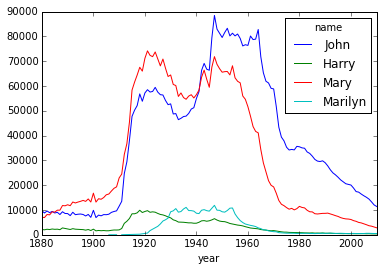

In [126]:
subset.plot()

각 열을 개별 그래프로 표시

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011389E10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000413E4AC8>], dtype=object)

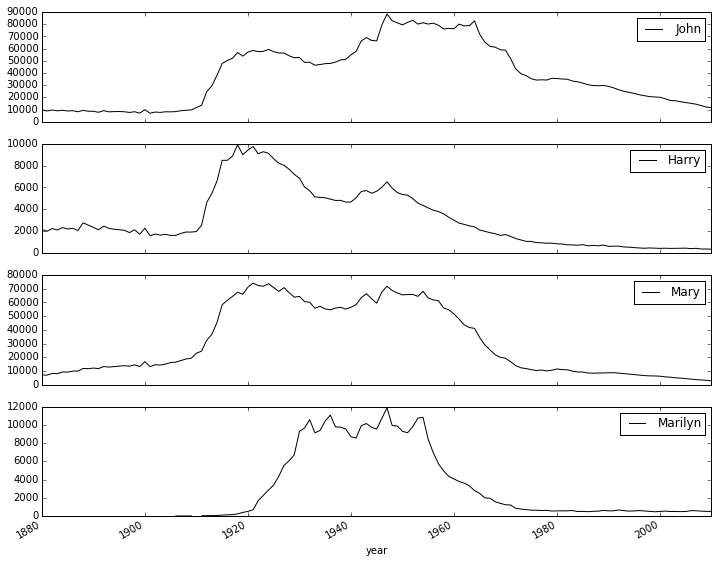

In [129]:
subset.plot(subplots=True, figsize=(12,10), grid=False)

#### 다양한 이름을 사용하는 경향?

상위 1000개의 이름이 전체에서 차지하는 비율이 감소할수록 다양한 이름을 사용한다고 할 수 있다.

In [131]:
table = top1000.pivot_table('prop', aggfunc='xyz', index='year', columns='sex')
table[:5]

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


상위 1000개 이름의 연도별 성별 비율의 추세를 그래프로 출력

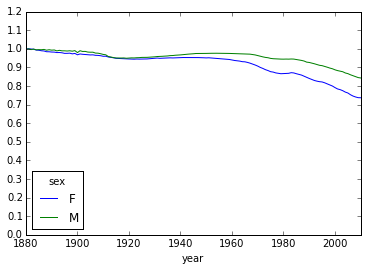

In [139]:
table.plot(yticks=np.linspace(0, 1.2, 13))

분석 목표: 전체 출생수 50%를 차지하는 이름의 개수

50%를 차지하는 이름의 개수가 많을 수록 다양한 이름이 등작한다고 할 수 있다.

In [133]:
boys2010 = boys[boys.year == 2010]
boys2010[:5]

name sex  births  year      prop
year sex                                             
2010 M   1676644    Jacob   M   21875  2010  0.011523
         1676645    Ethan   M   17866  2010  0.009411
         1676646  Michael   M   17133  2010  0.009025
         1676647   Jayden   M   17030  2010  0.008971
         1676648  William   M   16870  2010  0.008887

비율의 누적 합계 구하기

In [134]:
prop_cumsum = boys2010.sort_index(by='prop', ascending=False)['prop'].cumsum()
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

누적합계가 0.5와 같거나 큰 경우에 도달하는 인덱스 찾기

In [135]:
prop_cumsum.searchsorted(0.5)[0]

array([116], dtype=int64)

In [137]:
prop_cumsum[116]

0.5006516075268308

분석목표: 각 연도별 성별에 대해 50%에 해당하는 이름의 개수 산출

In [148]:
def get_half_count(group, q=0.5):
    # 비율이 높은 순으로 내림차순 정렬
    group = group.sort_index(by='prop', ascending=False)
    # 배열의 색인이 0부터 시작하기 때문에 마지막에 1을 더해주어야 함.
    return group.prop.cumsum().searchsorted(q)[0]+1

In [155]:
diversity = top1000.groupby(['year', 'sex']).apply(get_half_count, q=0.4)
diversity = diversity.unstack('sex')

In [156]:
diversity[:10]

sex,F,M
year,,
1880,24,9
1881,25,9
1882,25,9
1883,26,9
1884,26,10
1885,27,10
1886,28,10
1887,28,11
1888,29,11


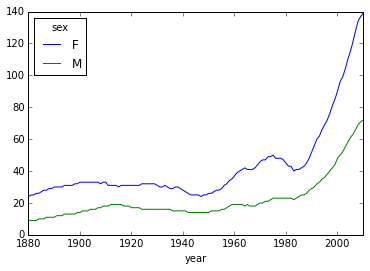

In [157]:
diversity.plot()

#### 마지막 글자의 변화

(... 궁금한 것도 많네 ...)

name 열에서 마지막 글자만 추출하기

In [158]:
def get_last_letter(name):
    return name[-1]

In [161]:
last_letters = names['name'].apply(get_last_letter)
last_letters[:5]

0    y
1    a
2    a
3    h
4    e
Name: name, dtype: object

분석 목표: 성별 연도별 마지막 글자에 대한 출생수 합계

In [163]:
last_letters_table = names.pivot_table('births', aggfunc=sum,
                 index=last_letters,
                 columns=['sex', 'year'])
last_letters_table

sex       F                                                                 \
year   1880   1881   1882   1883   1884   1885   1886   1887   1888   1889   
name                                                                         
a     31446  31581  36536  38330  43680  45408  49100  48942  59442  58631   
b       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
c       NaN    NaN      5      5    NaN    NaN    NaN    NaN    NaN    NaN   
d       609    607    734    810    916    862   1007   1027   1298   1374   
e     33378  34080  40399  41914  48089  49616  53884  54353  66750  66663   
f       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
g         7      5     12      8     24     11     18     25     44     28   
h      4863   4784   5567   5701   6602   6624   7146   7141   8630   8826   
i        61     78     81     76     84     92     85    105    141    134   
j       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
k        13     15     11     17     21     18     27     19     21     22   
l      2541   2911   3527   3848   4808   5144   5721   6175   7900   8395   
m        58     57     81     86     79     75    103     90    123    137   
n      3008   2959   3576   3837   4507   4735   5242   5512   6833   7103   
o        30     49     35     47     74     84     93     97    134    142   
p       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
q       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
r       481    417    590    640    718    799    917    910   1207   1214   
s      1391   1316   1637   1794   2039   2127   2524   2803   3582   3569   
t      2152   2165   2399   2554   2825   2889   3017   3140   3816   3784   
u       380    427    410    444    490    495    511    476    541    469   
v       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
w       NaN      5    NaN    NaN    NaN    NaN      5    NaN    NaN    NaN   
x       NaN    NaN    NaN      7    NaN    NaN    NaN    NaN    NaN    NaN   
y     10469  10404  12145  12063  13917  13927  14936  14980  17931  17601   
z       106     95    106    141    148    150    202    188    238    277   

sex    ...         M                                                          \
year   ...      2001    2002    2003    2004    2005    2006    2007    2008   
name   ...                                                                     
a      ...     39124   38815   37825   38650   36838   36156   34654   32901   
b      ...     50950   49284   48065   45914   43144   42600   42123   39945   
c      ...     27113   27238   27697   26778   26078   26635   26864   25318   
d      ...     60838   55829   53391   51754   50670   51410   50595   47910   
e      ...    145395  144651  144769  142098  141123  142999  143698  140966   
f      ...      1758    1817    1819    1904    1985    1968    2090    2195   
g      ...      2151    2084    2009    1837    1882    1929    2040    2059   
h      ...     85959   88085   88226   89620   92497   98477   99414  100250   
i      ...     20980   23610   26011   28500   31317   33558   35231   38151   
j      ...      1069    1088    1203    1094    1291    1241    1254    1381   
k      ...     42477   42043   42296   41400   42151   42537   42136   39563   
l      ...    153648  153493  153862  152800  155312  156234  155203  150791   
m      ...     41967   42663   42790   43054   41600   42503   43860   44316   
n      ...    616099  630322  663419  676011  686326  720998  741355  733869   
o      ...     82146   83180   85423   88822   92001   96350   96895   91485   
p      ...      3419    3157    2982    2841    2768    2721    2739    2637   
q      ...       602     618     585     523     446     430     431     339   
r      ...    165377  164821  169878  169452  172069  176490  177207  174632   
s      ...    143791  139595  138632  139642  139913  143

특정 연도만 대표적으로 추출하기

1910, 1960, 2010년

In [169]:
last_letters_table['F'][:3]

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,,,,,,,,,,,,
a,31446,31581,36536,38330,43680,45408,49100,48942,59442,58631,...,673418,681001,702628,710441,727357,753391,752779,723405,698477,670605
b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,394,332,344,601,369,367,409,408,435,450
c,NaN,NaN,5,5,NaN,NaN,NaN,NaN,NaN,NaN,...,539,607,649,663,613,633,775,926,931,946


In [164]:
last_letters_table[[1910, 1960, 2010]] # 색인이 계층적이라 오류!

IndexError: indices are out-of-bounds

계층 색인의 year 부분의 일부만 선택해 열의 색인을 재구성

In [166]:
subtable = last_letters_table.reindex(columns=[1910, 1960, 2010], level='year')
subtable[:5]

sex        F                      M                
year    1910    1960    2010   1910    1960    2010
name                                               
a     108376  691247  670605    977    5204   28438
b        NaN     694     450    411    3912   38859
c          5      49     946    482   15476   23125
d       6750    3729    2607  22111  262112   44398
e     133569  435013  313833  28655  178823  129012

분석 목표: 각 글자가 차지하는 비율 계산

In [171]:
letter_prop = subtable/subtable.sum().astype(float)
letter_prop[:5]

sex          F                             M                    
year      1910      1960      2010      1910      1960      2010
name                                                            
a     0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b          NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c     0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d     0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e     0.336941  0.215133  0.178415  0.147556  0.083853  0.067959

성별 마지막 글자 그래프 출력

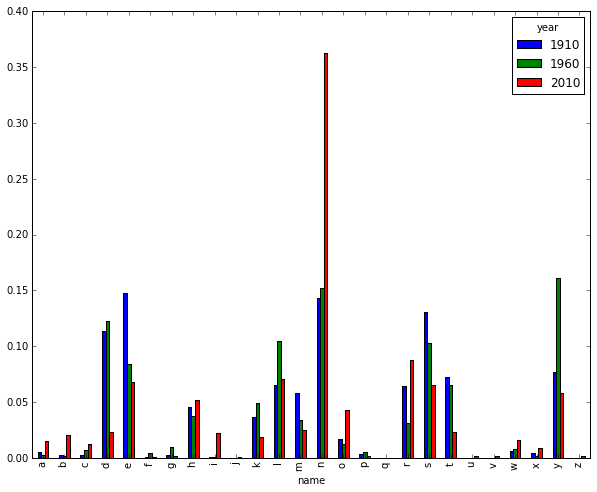

In [179]:
letter_prop['M'].plot(kind='bar', figsize=(10,8))

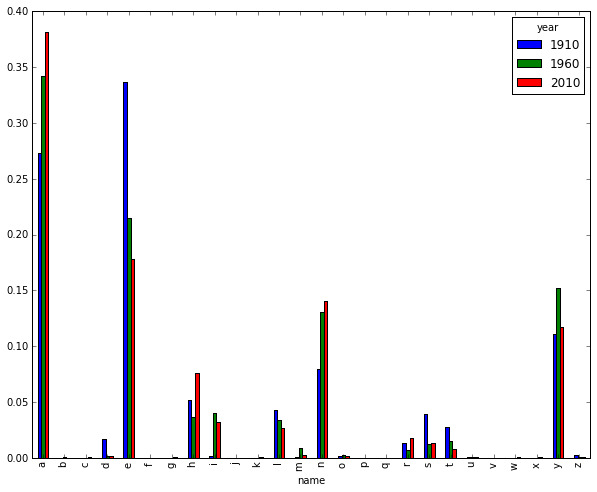

In [175]:
letter_prop['F'].plot(kind='bar', figsize=(10,8))

분석 목표: 특정 글자 (d/n/y)의 시대별 추세 

1880-2010년 전체에 대해 각 글자의 비율 변화 산출 필요

In [183]:
letter_prop = last_letters_table / last_letters_table.sum().astype(float)
letter_prop[:5]

sex          F                                                              \
year      1880      1881      1882      1883      1884      1885      1886   
name                                                                         
a     0.345587  0.343440  0.338764  0.341251  0.338550  0.341270  0.339703   
b          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
c          NaN       NaN  0.000046  0.000045       NaN       NaN       NaN   
d     0.006693  0.006601  0.006806  0.007211  0.007100  0.006478  0.006967   
e     0.366819  0.370616  0.374582  0.373159  0.372722  0.372896  0.372802   

sex                                   ...            M                      \
year      1887      1888      1889    ...         2001      2002      2003   
name                                  ...                                    
a     0.335258  0.332764  0.328706    ...     0.020162  0.020019  0.019177   
b          NaN       NaN       NaN    ...     0.026256  0.025418  0.024368   
c          NaN       NaN       NaN    ...     0.013972  0.014048  0.014042   
d     0.007035  0.007266  0.007703    ...     0.031352  0.028794  0.027069   
e     0.372324  0.373675  0.373736    ...     0.074927  0.074603  0.073396   

sex                                                                         
year      2004      2005      2006      2007      2008      2009      2010  
name                                                                        
a     0.019505  0.018481  0.017635  0.016747  0.016189  0.015927  0.014980  
b     0.023171  0.021645  0.020778  0.020357  0.019655  0.019693  0.020470  
c     0.013514  0.013083  0.012991  0.012983  0.012458  0.012186  0.012181  
d     0.026118  0.025420  0.025075  0.024451  0.023574  0.023398  0.023387  
e     0.071710  0.070799  0.069748  0.069445  0.069362  0.068663  0.067959  

[5 rows x 262 columns]

d/n/y로 끝나는 남자 이름의 시대별 비율

In [189]:
rows = ['d', 'n', 'y']
cols = 'M'
letter_dny_male = letter_prop.ix[rows, cols]
# 행열 전환
letter_dny_male = letter_dny_male.T
letter_dny_male[:5]

name,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


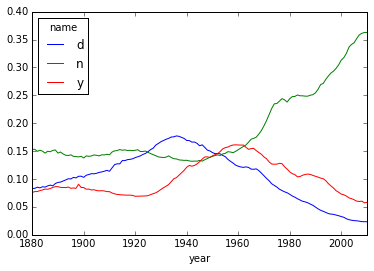

In [190]:
letter_dny_male.plot()

#### 남자 이름과 여자 이름이 시대에 따라 바뀌는 경우?

상위 1000개 이름 전체 목록 구하기

In [191]:
all_names = top1000.name.unique()
all_names[:10]

array(['Mary', 'Anna', 'Emma', 'Elizabeth', 'Minnie', 'Margaret', 'Ida',
       'Alice', 'Bertha', 'Sarah'], dtype=object)

문자열 'lesl'로 시작하는 이름 찾기

In [200]:
'a' in 'abc'

True

In [201]:
'lesl' in 'lesley'

True

In [202]:
'lesl' in 'mary'

False

In [207]:
name_lesl = np.array(['lesl' in name.lower() for name in all_names])
name_lesl

array([False, False, False, ..., False, False, False], dtype=bool)

In [206]:
lesley_like = all_names[name_lesl]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

상위 1000개의 이름 중 해당 이름들만 추출

Series.isin() : "이 중에 하나" --> True

In [221]:
lesley_like_names = top1000[top1000['name'].isin(lesley_like)]
lesley_like_names

name sex  births  year      prop
year sex                                            
1880 F   654      Leslie   F       8  1880  0.000088
     M   1108     Leslie   M      79  1880  0.000715
1881 F   2523     Leslie   F      11  1881  0.000120
     M   3072     Leslie   M      92  1881  0.000913
1882 F   4593     Leslie   F       9  1882  0.000083
     M   5081     Leslie   M     122  1882  0.001073
         5865     Lesley   M       6  1882  0.000053
1883 F   6850     Leslie   F       7  1883  0.000062
     M   7225     Leslie   M     120  1883  0.001147
         8093     Lesley   M       5  1883  0.000048
1884 F   8697     Leslie   F      15  1884  0.000116
     M   9432     Leslie   M     125  1884  0.001092
1885 F   11161    Leslie   F      10  1885  0.000075
     M   11751    Leslie   M     122  1885  0.001132
1886 F   13601    Leslie   F       8  1886  0.000055
     M   14132    Leslie   M     136  1886  0.001228
1887 F   15806    Leslie   F      12  1887  0.000082
     M   16524    Leslie   M     166  1887  0.001637
1888 F   18030    Leslie   F      23  1888  0.000129
     M   19074    Leslie   M     175  1888  0.001448
1889 F   20690    Leslie   F      23  1889  0.000129
     M   21737    Leslie   M     155  1889  0.001402
1890 F   23332    Leslie   F      20  1890  0.000105
     M   24372    Leslie   M     181  1890  0.001630
1891 F   25928    Leslie   F      28  1891  0.000151
     M   27068    Leslie   M     164  1891  0.001621
1892 F   28704    Leslie   F      22  1892  0.000104
     M   29851    Leslie   M     207  1892  0.001696
1893 F   31576    Leslie   F      26  1893  0.000122
     M   32765    Leslie   M     185  1893  0.001647
...                  ...  ..     ...   ...       ...
2000 F   1332261  Leslie   F    3619  2000  0.001995
         1332560   Lesly   F     742  2000  0.000409
         1332601  Lesley   F     658  2000  0.000363
2001 F   1362012  Leslie   F    3610  2001  0.002007
         1362300   Lesly   F     801  2001  0.000445
         1362452  Lesley   F     509  2001  0.000283
2002 F   1392272  Leslie   F    3520  2002  0.001962
         1392586   Lesly   F     717  2002  0.000400
         1392743  Lesley   F     471  2002  0.000262
2003 F   1422818  Leslie   F    3635  2003  0.001992
         1423091   Lesly   F     838  2003  0.000459
         1423330  Lesley   F     451  2003  0.000247
2004 F   1453982  Leslie   F    3497  2004  0.001908
         1454295   Lesly   F     747  2004  0.000408
         1454500  Lesley   F     450  2004  0.000245
2005 F   1486010  Leslie   F    3120  2005  0.001692
         1486308   Lesly   F     783  2005  0.000425
         1486623  Lesley   F     381  2005  0.000207
2006 F   1518523  Leslie   F    3035  2006  0.001600
         1518834   Lesly   F     761  2006  0.000401
         1519161  Lesley   F     370  2006  0.000195
2007 F   1552581  Leslie   F    2689  2007  0.001403
         1552882   Lesly   F     765  2007  0.000399
         1553271  Lesley   F     351  2007  0.000183
2008 F   1587484  Leslie   F    2323  2008  0.001233
         1587788   Lesly   F     699  2008  0.000371
2009 F   1622503  Leslie   F    1975  2009  0.001081
         1622845   Lesly   F     598  2009  0.000327
2010 F   1657142  Leslie   F    1558  2010  0.000886
         1657525   Lesly   F     502  2010  0.000285

[400 rows x 5 columns]

대상 이름의 전체 기간에 대한 출생수 합계 산출

In [211]:
total_lesley_births = lesley_like_names.groupby('name').births.sum()
total_lesley_births

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

성별과 연도별로 lesl를 포함하는 이름의 출생수 합계 산출

In [213]:
total_lesley_year_sex = lesley_like_names.pivot_table('births', aggfunc='sum', 
                               index='year', columns='sex')

In [215]:
total_lesley_year_sex[:3]

sex,F,M
year,,
1880,8,79
1881,11,92
1882,9,128


해당 이름들이 성별에서 차지하는 비율 정규화

In [219]:
normed_total_lesley = total_lesley_year_sex.div(total_lesley_year_sex.sum(1), axis=0)
normed_total_lesley[:5]

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


시대별 이름의 성별 변화 추이 그래프 출력

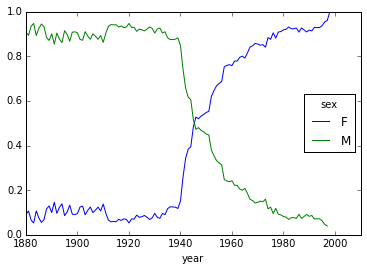

In [220]:
normed_total_lesley.plot()